# Worksheet 18

Name:  Haocheng Liu
UID: U06776662

### Topics

- Linear Regression

### Optional Challenge

Every day my alarm goes off at seemingly random times… I’ve recorded the times at which it goes off for the past year of so (1 - 355 days). Today is day 356. Can you predict when my alarm will ring using `data.csv`?

Please fill out the piazza poll if you think you found the answer.

## Linear Regression

a) Create and plot a dataset of 100 (Y, X) points where `Y = 1 + 0.5 * X + eps`.

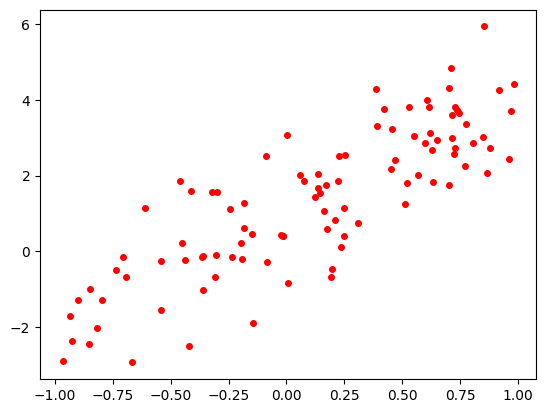

In [1]:
import numpy as np
import matplotlib.pyplot as plt

SAMPLE_SIZE = 100

true_beta = np.array([ 1 , 3 ])
x = -1.0 + 2.0 * np.random.random(SAMPLE_SIZE)
y = true_beta[0] + true_beta[1] * x + np.random.randn(SAMPLE_SIZE)
plt.plot(x,y,'ro',markersize=4)
plt.show()

b) Plot the least squares estimate line through the scatter plot.

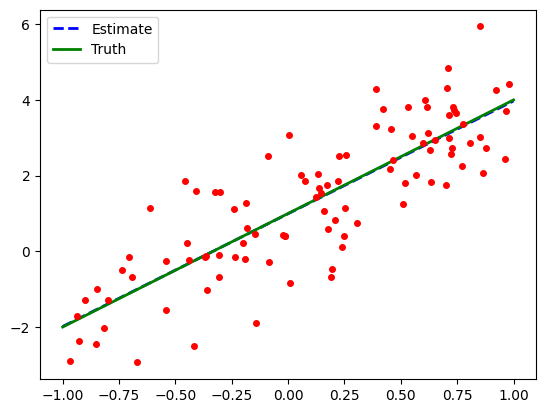

In [2]:
intercept = np.ones(np.shape(x)[0])
X = np.array([intercept, x]).T
beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y

x_plot = np.linspace(-1,1,50)
y_est = beta_hat[0] + beta_hat[1] * x_plot
plt.plot(x_plot, y_est,'b--', lw=2, label='Estimate')
plt.plot(x_plot, true_beta[0] + true_beta[1] * x_plot, lw=2, c='g', label='Truth')
plt.plot(x, y,'ro',markersize=4)
plt.legend()
plt.show()

c) How does the estimate of `beta` compare to the parameters we used to generate the data?

The estimated beta values (\(\hat{\beta}\)) from the linear regression should ideally be close to the true beta values used to generate the data, indicating that the model has accurately captured the underlying pattern. However, they will not be exactly the same due to the random error (\(\epsilon\)) introduced in the data generation process. The comparison of these values allows us to assess the model's performance and the impact of the random noise on the estimation accuracy.

d) Create and plot a dataset of 100 (Y, X) points where `Y = 1 + 3 * X + .5 * X^2 + eps`.

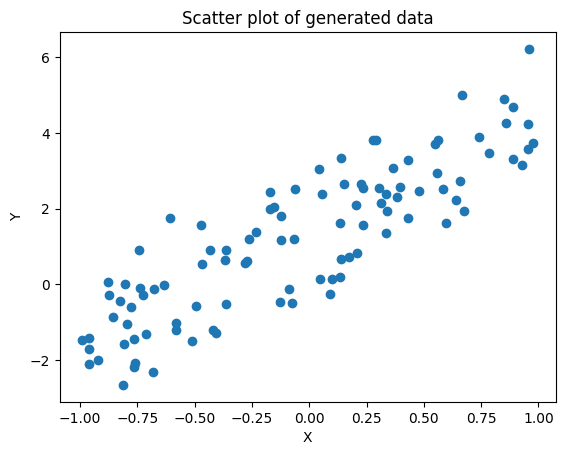

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
SAMPLE_SIZE = 100
np.random.seed(0)  # for reproducibility

# Generate X values
X = np.random.rand(SAMPLE_SIZE) * 2 - 1  # X values between -1 and 1

# Calculate Y values using the equation
epsilon = np.random.randn(SAMPLE_SIZE)  # noise
Y = 1 + 3 * X + 0.5 * X**2 + epsilon

# Plot
plt.scatter(X, Y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter plot of generated data')
plt.show()


e) Plot the least squares estimate line through the scatter plot.

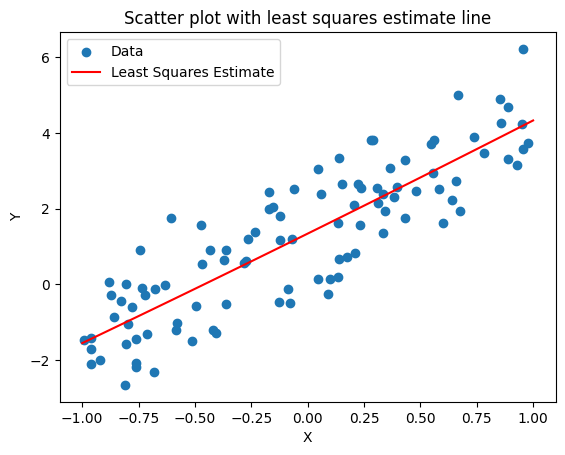

In [4]:
# Add the X^2 term for quadratic regression
X_quad = np.column_stack((np.ones(SAMPLE_SIZE), X, X**2))

# Calculate the coefficients using the least squares method
coefficients = np.linalg.inv(X_quad.T @ X_quad) @ X_quad.T @ Y

# Generate points for the estimate line
X_fit = np.linspace(-1, 1, 100)
Y_fit = coefficients[0] + coefficients[1] * X_fit + coefficients[2] * X_fit**2

# Plot the scatter plot and the estimate line
plt.scatter(X, Y, label='Data')
plt.plot(X_fit, Y_fit, 'r-', label='Least Squares Estimate')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter plot with least squares estimate line')
plt.legend()
plt.show()


f) How does the estimate of `beta` compare to the parameters we used to generate the data?

To compare the estimate of beta with the parameters used to generate the data, you would print out the calculated coefficients from the quadratic regression and compare them to the true coefficients (which are 1, 3, and 0.5 for the constant, linear, and quadratic terms, respectively)

g) Let's repeat d) and f) a large number of times to see how close our estimates are on average and what that distribution looks like.

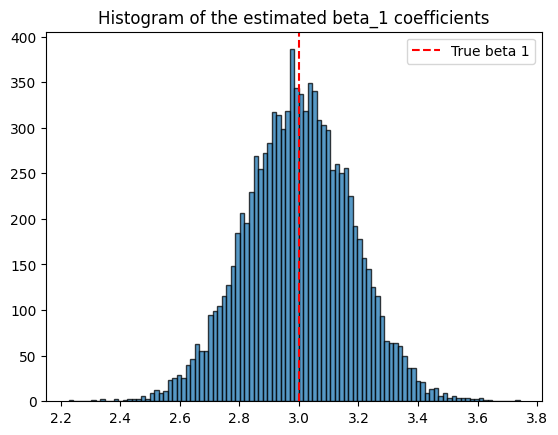

In [5]:
import numpy as np
import matplotlib.pyplot as plt

betas = []
true_beta = np.array([1, 3, 0.5])  # Replace with the actual true_beta values
SAMPLE_SIZE = 100  # or the appropriate sample size

for _ in range(10000):
    X = -1 + 2 * np.random.random(SAMPLE_SIZE)
    Y = true_beta[0] + true_beta[1] * X + true_beta[2] * X**2 + np.random.randn(SAMPLE_SIZE)  # Replace with the actual model
    intercept = np.ones((X.shape[0]))
    X = np.column_stack((intercept, X, X**2))
    
    # Calculate the beta estimates using the normal equation
    beta_hat = np.linalg.inv(X.T @ X) @ X.T @ Y
    betas.append(beta_hat)

betas = np.array(betas)

# Plot histogram for the second beta coefficient
plt.hist(betas[:, 1], bins=100, edgecolor='k', alpha=0.75)
plt.axvline(x=true_beta[1], c='r', linestyle='dashed', label='True beta 1')
plt.title('Histogram of the estimated beta_1 coefficients')
plt.legend()
plt.show()
